In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv',sep=',',index_col=None)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
model = pd.DataFrame(df, columns = ['mpg', 'acceleration'])

model

,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
...,...,...
393,27.0,15.6
394,44.0,24.6
395,32.0,11.6
396,28.0,18.6


In [ ]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [ ]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [ ]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]

In [ ]:
points = model

points[:10]



,mpg,acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [ ]:
len(points)

398

In [ ]:
points=points.reset_index().values

In [ ]:
points[:10]

array([[ 0. , 18. , 12. ],
       [ 1. , 15. , 11.5],
       [ 2. , 18. , 11. ],
       [ 3. , 16. , 12. ],
       [ 4. , 17. , 10.5],
       [ 5. , 15. , 10. ],
       [ 6. , 14. ,  9. ],
       [ 7. , 14. ,  8.5],
       [ 8. , 14. , 10. ],
       [ 9. , 15. ,  8.5]])

In [ ]:
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

In [ ]:
points[1,1]

15.0

In [ ]:
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))

Starting gradient descent at b = 0, m = 0, error = 613.8712562814071


In [ ]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

In [ ]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.12252253313266287, m = 1.4931509862180814, error = 50.8852731718681


In [ ]:
points[1]

array([ 1. , 15. , 11.5])

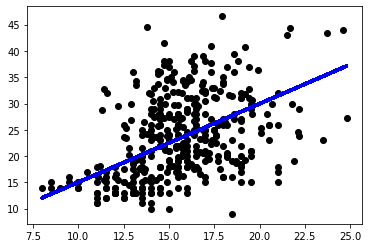

In [ ]:
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='black')

        plt.plot(model.acceleration, (1.4920263083109613 * model.acceleration + 0.1211874783663623), color='blue',linewidth=3)

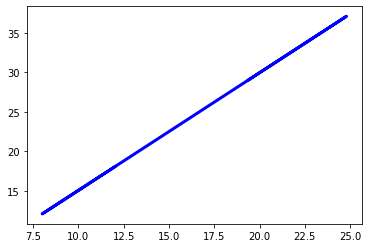

In [ ]:
plt.plot(model.acceleration, (1.4920263083109613 * model.acceleration + 0.1211874783663623), color='blue',linewidth=3)